**Implementing Linear Regression model from scratch**

Data set taken from kaggle : https://www.kaggle.com/andonians/random-linear-regression

#**Data preprocesssing**

Simple data preprocessing has been carried out becuase of the nature of the data set

In [ ]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Reading training data
data = pd.read_csv("train.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
#Details of data
data.info()
print("-------------------------------------------------")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
-------------------------------------------------
x    0
y    1
dtype: int64


There seems to be missing data in the dependant feature

In [ ]:
#Splitting data into X and y
X = data.iloc[:,0].values
y = data.iloc[:,1].values
print(X.shape, y.shape)

#Reshaping data to make it a column vector
X = X.reshape(len(X), 1)
y = y.reshape((len(y), 1)) 
print(X.shape, y.shape)

(700,) (700,)
(700, 1) (700, 1)


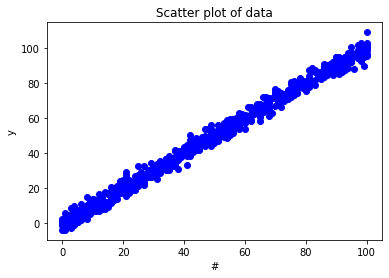

In [ ]:
#Visualizing data
plt.scatter(X,y,color = 'blue')
plt.title("Scatter plot of data")
plt.xlabel("#")
plt.ylabel("y")
plt.show()

In [ ]:
#Handling missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(y)
y = imputer.transform(y)

print(X.shape, y.shape)

(700, 1) (700, 1)


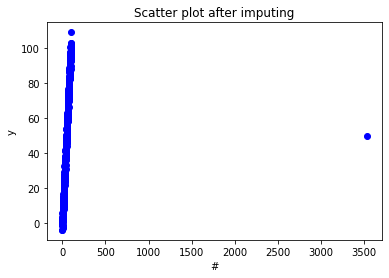

In [ ]:
#Data after imputing
plt.scatter(X,y,color = 'blue')
plt.title("Scatter plot after imputing")
plt.xlabel("#")
plt.ylabel("y")
plt.show()

There seems to be an outlier. We will find number of outliers present in data:

In [ ]:
#Finding index of outlier
index = np.where(X > 150)
print(index)

(array([213]), array([0]))


As there seems to be only two of them, we will remove them

In [ ]:
#Removing outlier
X = np.delete(X, index)
y = np.delete(y, index)

X = X.reshape(len(X), 1)
y = y.reshape((len(y), 1)) 
print(X.shape, y.shape)

(698, 1) (698, 1)


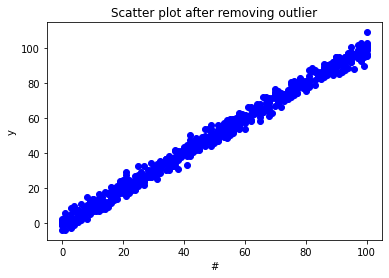

In [ ]:
#Data after handling outlier
plt.scatter(X,y,color = 'blue')
plt.title("Scatter plot after removing outlier")
plt.xlabel("#")
plt.ylabel("y")
plt.show()

In [ ]:
#Adding bias x0
X_new = np.concatenate((np.ones((len(X), 1), dtype=int), X), axis=1)
print(X_new.shape, X_new)

(698, 2) [[ 1. 50.]
 [ 1. 15.]
 [ 1. 38.]
 ...
 [ 1. 82.]
 [ 1. 66.]
 [ 1. 97.]]


#**Model building**

In [ ]:
#cost function
def get_cost(m, h, y):
    """
    Arguments: 
      m - size of training set
      h - hypothesis function (X * theta)
      y - dependent variable

    Returns:
      J - Computed cost    
    """
    J = float((1/(2*m)) * sum(((h - y) ** 2)))
    return J

In [ ]:
#gradient descent
def grad_func(m, X, y, theta, alpha, h):
    """
    Arguments: 
      m - size of training set
      X - Feature matrix X also containing the bias variable
      y - dependent variable
      theta - parameters being optimized
      alpha - learning rate 
      h - hypothesis function (X * theta)

    Returns:
      theta - Optimized parameters    
    """

    theta = theta - ((alpha/m) * (np.matmul((h - y).T, X))).T
    return theta

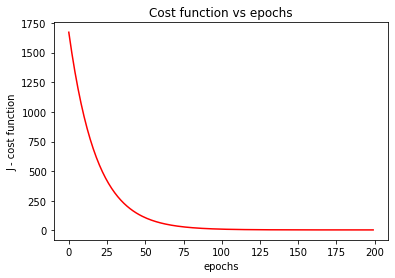

In [ ]:
#Linear Regression from scratch
m = len(X_new)
alpha = 0.00059 #Obatined by trial and error
cost = []
epochs = 200

#theta initialization
theta = np.zeros((X_new.shape[1], 1),dtype=float)

for i in range(epochs):
  h = np.matmul(X_new, theta)
  J = get_cost(m, h, y)
  cost.append(J)
  theta = grad_func(m, X_new, y, theta, alpha, h)

#Plotting cost function vs epochs
plt.plot(list(range(epochs)), cost, '-r')
plt.title("Cost function vs epochs")
plt.xlabel("epochs")
plt.ylabel("J - cost function")
plt.show()

In [ ]:
#Final theta value
print(theta)

[[0.01159271]
 [0.99508127]]


#**Results and visualization**

In [ ]:
#Preparing test data
#reading test set data
data = pd.read_csv("test.csv")

#splitting data
Xt = data.iloc[:,0].values
yt = data.iloc[:,1].values
print(Xt.shape, yt.shape)

#reshaping data
Xt = Xt.reshape(len(Xt), 1)
yt = yt.reshape((len(yt), 1)) 
print(Xt.shape, yt.shape)

#adding bias variable
Xt_new = np.concatenate((np.ones((len(Xt), 1), dtype=int), Xt), axis=1)
print(Xt_new.shape, yt.shape)

(300,) (300,)
(300, 1) (300, 1)
(300, 2) (300, 1)


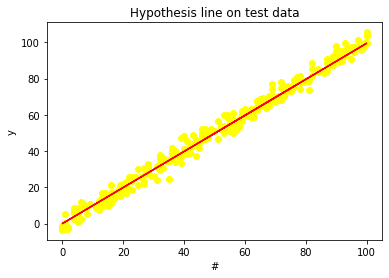

In [ ]:
#Predicting results
y_pred = np.matmul(Xt_new, theta)

#Visualizing
plt.scatter(Xt, yt, color = 'yellow')
plt.plot(Xt, y_pred, color = 'red')
plt.title("Hypothesis line on test data")
plt.xlabel("#")
plt.ylabel("y")
plt.show()

In [ ]:
#Metrics based results
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(yt, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(yt, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(yt, y_pred)))

Mean Absolute Error:  2.447580597576722
Mean Squared Error:  9.721880414297367
Root Mean Squared Error:  3.117993010623559


**THANK YOU!**